# Strip of land with same rise at both sides

This exercise was done in class on 2019-01-10

In [2]:
# import modules we need
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc

# The uniform aquifer of half-infinite extent ($0 \le x \le \infty$)

The solution is valid for a uniform aquifer of half infinite extent, i.e. $x \ge 0$ and $kD$ and $S$ are constant. Further $s(0, x) = 0$. And we have as boundary condition that $s(t, 0) = A$ for $t \ge 0$:

$$ s(x, t) = A \, \mathtt{erfc} \left( u \right)$$

where

$$ u =   \sqrt {\frac {x^2 S} {4 kD t} } = x \sqrt{ \frac {S} {4 kD t} }, \,\,\, x \ge 0 $$

The erfc function is a well-known function in engineering, which is derived from statistics. It is mathematically defined as

$$ \mathtt{erfc}(z) = \frac 2 {\sqrt{\pi}} \intop _z ^{\infty} e^{-y^2} dy $$

We don't have to implement it, because it is available in `scipy.special` as `erfc`.

However, we need the mathematical expression to get its derivation, which we need to compute the flow

$$ Q = -kD \frac {\partial s} {\partial x} $$

$$ = -kD \, A \, \frac {\partial \mathtt{erfc} (u)} {\partial x} $$

$$ = kD \, A \,\frac 2 {\sqrt \pi} e^{-u^2} \frac {\partial u} {\partial x} $$

$$ = kD \, A \, \frac 2 {\sqrt \pi} e^{-u^2} \sqrt {\frac S {4 kD t}} $$

$$ Q = A \,\sqrt {\frac {kD S} {\pi t}}e^{-u^2}  $$ 

# A half-infinite aquifer first

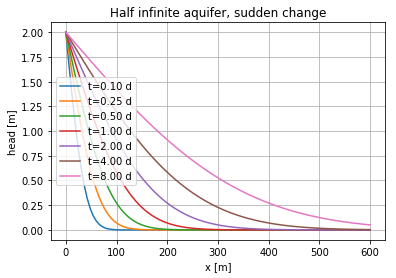

In [3]:
kD = 900 # m2/d
S = 0.2  # [-]
L = 2000 # m
b = L/2 # half width
A = 2. # m

x = np.linspace(0, 0.6 * b, 101) # why 0.6 b ??
time = [0.1, 0.25, 0.5, 1, 2, 4, 8] # d

plt.title('Half infinite aquifer, sudden change')
plt.xlabel('x [m]')
plt.ylabel('head [m]')
plt.grid()

for t in time:
    s = A * erfc (x * np.sqrt(S / (4 * kD * t)))
    plt.plot(x, s, label='t={:.2f} d'.format(t))

plt.legend(loc='center left')
plt.show()

## Strip of width $L = 2b$, head $s(t, x=\pm b) = A$ for $t>0$ and $s(t=0, x) = 0$ 

A strip of limited width requires mirroring to ensure tha tthe head at the head at each of the two boundaries $x = \pm b $ remains at the desired value. In this case, the we implement the situation where the head at both ends of the strip is suddenly raised to $A$ at $t=0$ and is kept at that value thereafter.

By starting with $s(0, x) = A$ and subtracting the solution, we get the situation where the head starts at $A$ and is suddenly lowered to $0$ at $t=0$. This allows comparison with the example hereafter.

We show the result (head as a function of $x$) for different times. The times are chosen equal to a multiple of the half-time $T_{50\%} \approx 0.28 \frac {b^2 S} {kD}$, so that the head of each next line should be reduced by 50\% relative to the previous time.

$$ s(x, t) = A \sum _{i=1} ^\infty \left\{
(-1) ^{i-1} \left[
\mathtt{erfc}\left( \left( (2 i -1) b + x \right)  \sqrt {\frac S {4 kD t}} \right) 
+
\mathtt{erfc}\left( \left( (2 i -1) b - x \right)  \sqrt {\frac S {4 kD t}} \right) \right]
\right\} $$

In [4]:
p=np.zeros_like(time)
p

array([0., 0., 0., 0., 0., 0., 0.])

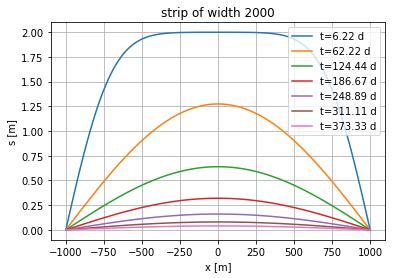

[2.36525413e-16 1.26697008e-03 2.53268982e-03 3.79591009e-03
 5.05538426e-03 6.30986938e-03 7.55812742e-03 8.79892650e-03
 1.00310421e-02 1.12532583e-02 1.24643688e-02 1.36631786e-02
 1.48485044e-02 1.60191766e-02 1.71740397e-02 1.83119542e-02
 1.94317969e-02 2.05324629e-02 2.16128657e-02 2.26719393e-02
 2.37086384e-02 2.47219399e-02 2.57108439e-02 2.66743744e-02
 2.76115805e-02 2.85215373e-02 2.94033468e-02 3.02561387e-02
 3.10790715e-02 3.18713329e-02 3.26321413e-02 3.33607456e-02
 3.40564269e-02 3.47184986e-02 3.53463074e-02 3.59392336e-02
 3.64966922e-02 3.70181329e-02 3.75030411e-02 3.79509385e-02
 3.83613828e-02 3.87339690e-02 3.90683295e-02 3.93641343e-02
 3.96210915e-02 3.98389474e-02 4.00174870e-02 4.01565343e-02
 4.02559519e-02 4.03156417e-02 4.03355448e-02 4.03156417e-02
 4.02559519e-02 4.01565343e-02 4.00174870e-02 3.98389474e-02
 3.96210915e-02 3.93641343e-02 3.90683295e-02 3.87339690e-02
 3.83613828e-02 3.79509385e-02 3.75030411e-02 3.70181329e-02
 3.64966922e-02 3.593923

In [14]:
plt.title('strip of width {}'.format(L))
plt.xlabel('x [m]')
plt.ylabel('s [m]')
plt.grid()

T50 = 0.28 * b**2 * S / kD # halftime of the head decline
time = np.array([0.1, 1, 2, 3, 4, 5, 6]) * T50 # multiple halftimes

x = np.linspace(-b, b, 101)
for t in time:
    s = A + np.zeros_like(x)
    for i in range(1, 20):
        si = A *(-1)**(i-1) * (
            erfc(((2 * i - 1) * b + x) * np.sqrt(S / (4 * kD * t)))
          + erfc(((2 * i - 1) * b - x) * np.sqrt(S / (4 * kD * t)))
        )
        s -= si        

    plt.plot(x, s, label='t={:.2f} d'.format(t))
plt.legend()
plt.show()
print(s)




## Symmetrical solution of a draining strip of land

This solution describes the head in a strip land of size $L = 2b$ where the initial head is everywhere equal to $A$ and where the head at $x = \pm b$ is suddenly lowered to zero at $t=0$. Hence, the groundwater will gradually drain until the head reaches zero everywhere at $t \rightarrow\infty$. Therefore, we should get exactly the same result as in the previous example, although the solution looks completely different mathematically.

$$ s(x, t) = A \frac 4 \pi \sum _{i=1} ^\infty \left\{
\frac {(-1)^{i-1}} {2i - 1} \cos \left[ (2 i - 1) \left( \frac \pi 2\right) \frac x b \right] \exp \left[ -(2 i - 1)^2 \left( \frac \pi 2 \right) ^2 
\frac {kD } {b^2 S} t \right] \right\} $$

NameError: name 'times' is not defined

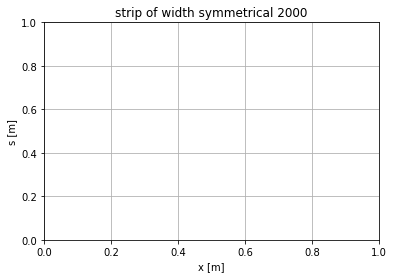

In [6]:
T = b**2 * S / kD

plt.title('strip of width symmetrical {}'.format(L))
plt.xlabel('x [m]')
plt.ylabel('s [m]')
plt.grid()

for t in times:
    s = np.zeros_like(x)
    for i in range(1, 20):
        si = ((-1)**(i - 1) / (2 * i - 1) * 
            np.cos((2 * i - 1) * (np.pi / 2) * x /b) * 
            np.exp(-(2 * i - 1)**2 * (np.pi / 2)**2 * t/T))
        s += A * 4 / np.pi * si
    plt.plot(x, s, label='t = {:.2f} d'.format(t))
plt.legend()
plt.show()